# Bank Scoring

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
xtest = pd.read_csv('X_test.csv')
xtrain = pd.read_csv('X_train.csv')
ytest = pd.read_csv('y_test_sample.csv')
ytrain = pd.read_csv('y_train.csv')

In [265]:
xtrain.head()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0


In [266]:
ytrain.head()

,target
0,0
1,0
2,0
3,0
4,0


In [267]:
xtest.head()

,index,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,143522,0.021069,60,0,0.184907,14403.715440,9,0,1,0,0.0
1,116747,0.009985,82,0,0.446264,6768.581963,6,0,3,0,0.0
2,66075,0.535187,43,1,0.406317,4686.080429,14,0,2,0,3.0
3,133292,0.051264,31,0,0.311893,3867.175176,8,0,0,0,1.0
4,83134,0.069525,45,0,0.294956,9869.273012,6,0,1,0,2.0


In [268]:
ytest.head()

,index,target
0,143522,0.226834
1,116747,0.252293
2,66075,0.592295
3,133292,0.697950
4,83134,0.672565


# Обработка данных и EDA

# Гистограммы

У нас несбалансированные данные целевой переменной

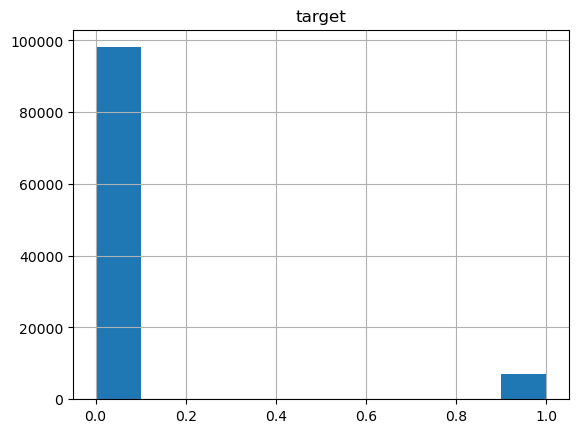

In [269]:
ytrain.hist();

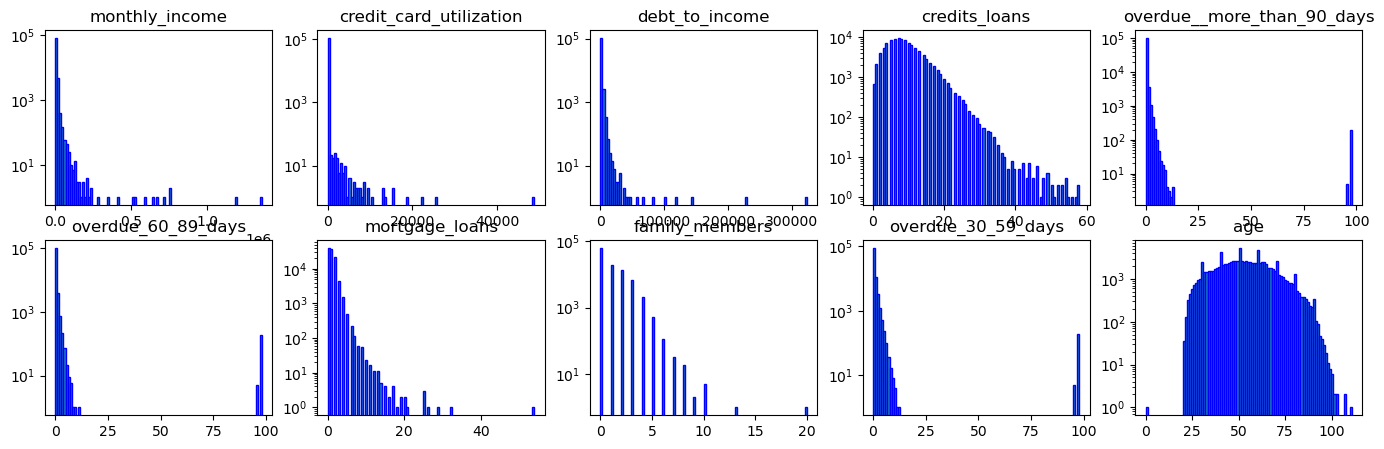

In [270]:
plt.figure(figsize=[17,5])
plt.subplot(2,5,1)
plt.hist(xtrain['monthly_income'], bins=100, edgecolor='blue', log=True)
plt.title('monthly_income')

plt.subplot(2,5,2)
plt.hist(xtrain['credit_card_utilization'], bins=100, edgecolor='blue', log=True)
plt.title('credit_card_utilization')

plt.subplot(2,5,3)
plt.hist(xtrain['debt_to_income'], bins=100, edgecolor='blue', log=True)
plt.title('debt_to_income')

plt.subplot(2,5,4)
plt.hist(xtrain['credits_loans'], bins=100, edgecolor='blue', log=True)
plt.title('credits_loans')

plt.subplot(2,5,5)
plt.hist(xtrain['overdue__more_than_90_days'], bins=100, edgecolor='blue', log=True)
plt.title('overdue__more_than_90_days')

plt.subplot(2,5,6)
plt.hist(xtrain['overdue_60_89_days'], bins=100, edgecolor='blue', log=True)
plt.title('overdue_60_89_days')

plt.subplot(2,5,7)
plt.hist(xtrain['mortgage_loans'], bins=100, edgecolor='blue', log=True)
plt.title('mortgage_loans')

plt.subplot(2,5,8)
plt.hist(xtrain['family_members'], bins=100, edgecolor='blue', log=True)
plt.title('family_members')

plt.subplot(2,5,9)
plt.hist(xtrain['overdue_30_59_days'], bins=100, edgecolor='blue', log=True)
plt.title('overdue_30_59_days')

plt.subplot(2,5,10)
plt.hist(xtrain['age'], bins=100, edgecolor='blue', log=True)
plt.title('age');

# Scatterplots

In [271]:
xtrain['target'] = ytrain['target']

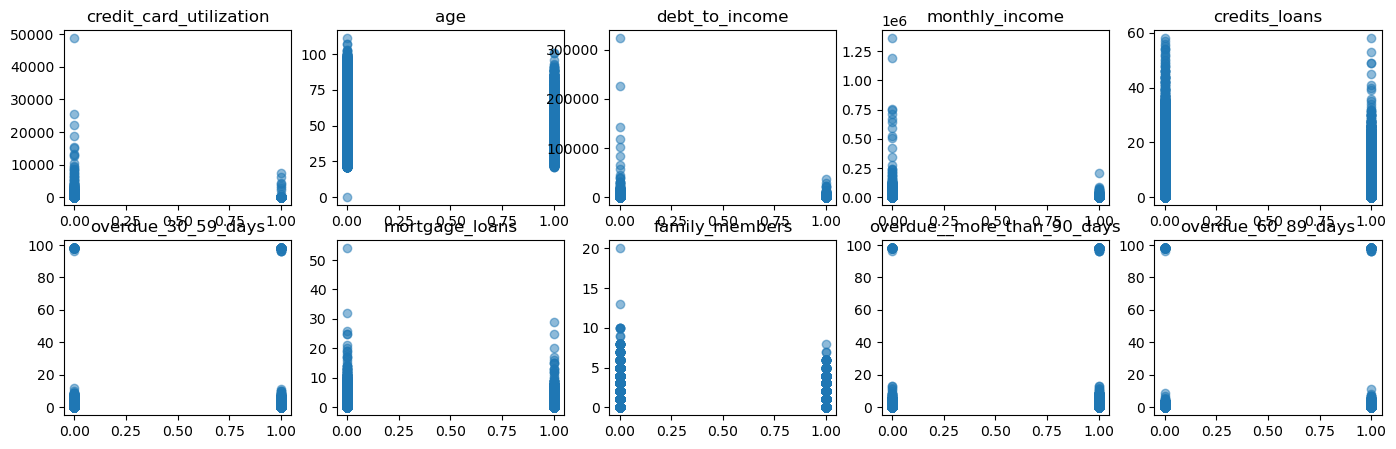

In [272]:
plt.figure(figsize=[17,5])
plt.subplot(2,5,1)
plt.scatter(xtrain['target'], xtrain['credit_card_utilization'], alpha=0.5) 
plt.title('credit_card_utilization')

plt.subplot(2,5,2)
plt.scatter(xtrain['target'], xtrain['age'], alpha=0.5) 
plt.title('age')

plt.subplot(2,5,3)
plt.scatter(xtrain['target'], xtrain['debt_to_income'], alpha=0.5) 
plt.title('debt_to_income')

plt.subplot(2,5,4)
plt.scatter(xtrain['target'], xtrain['monthly_income'], alpha=0.5) 
plt.title('monthly_income')

plt.subplot(2,5,5)
plt.scatter(xtrain['target'], xtrain['credits_loans'], alpha=0.5) 
plt.title('credits_loans')

plt.subplot(2,5,6)
plt.scatter(xtrain['target'], xtrain['overdue_30_59_days'], alpha=0.5) 
plt.title('overdue_30_59_days')

plt.subplot(2,5,7)
plt.scatter(xtrain['target'], xtrain['mortgage_loans'], alpha=0.5) 
plt.title('mortgage_loans')

plt.subplot(2,5,8)
plt.scatter(xtrain['target'], xtrain['family_members'], alpha=0.5) 
plt.title('family_members')

plt.subplot(2,5,9)
plt.scatter(xtrain['target'], xtrain['overdue__more_than_90_days'], alpha=0.5) 
plt.title('overdue__more_than_90_days')

plt.subplot(2,5,10)
plt.scatter(xtrain['target'], xtrain['overdue_60_89_days'], alpha=0.5) 
plt.title('overdue_60_89_days');


# Матрица корреляции

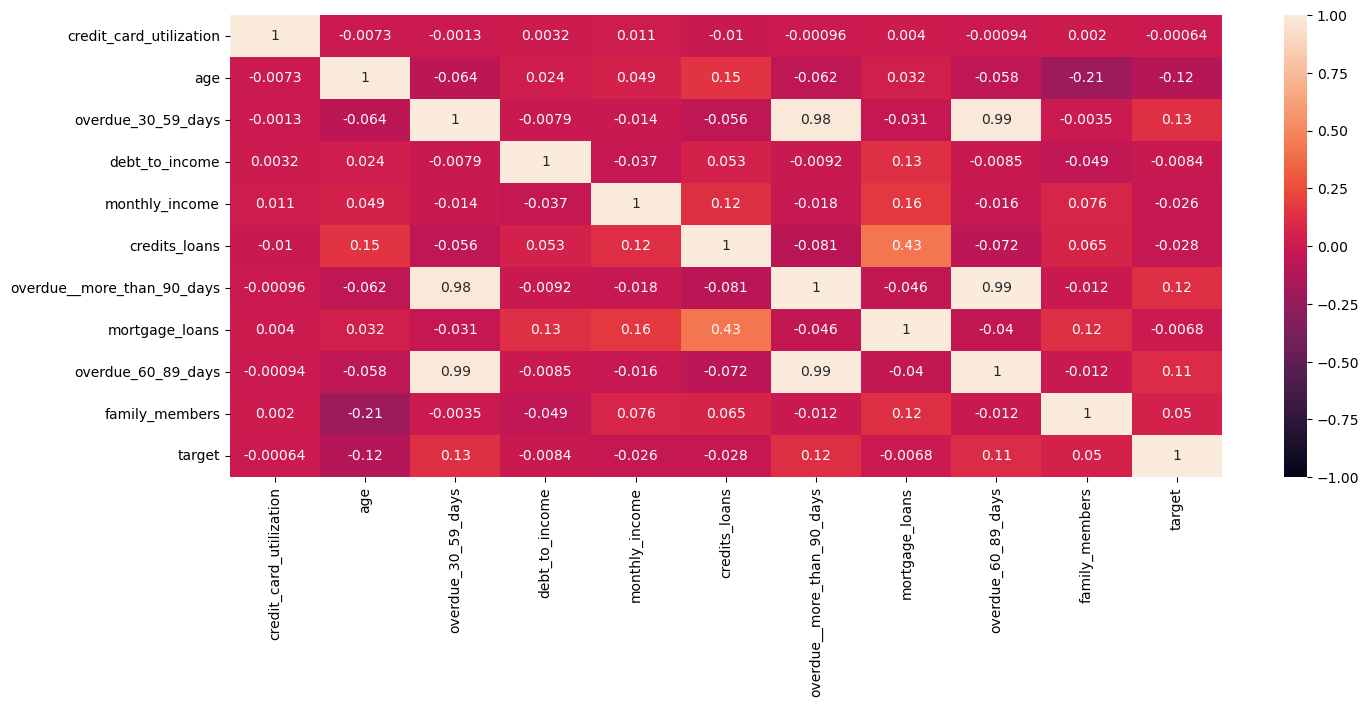

In [273]:
xtrain.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(xtrain.corr(), vmin=-1, vmax=1, annot=True);

In [274]:
from pandas.plotting import scatter_matrix

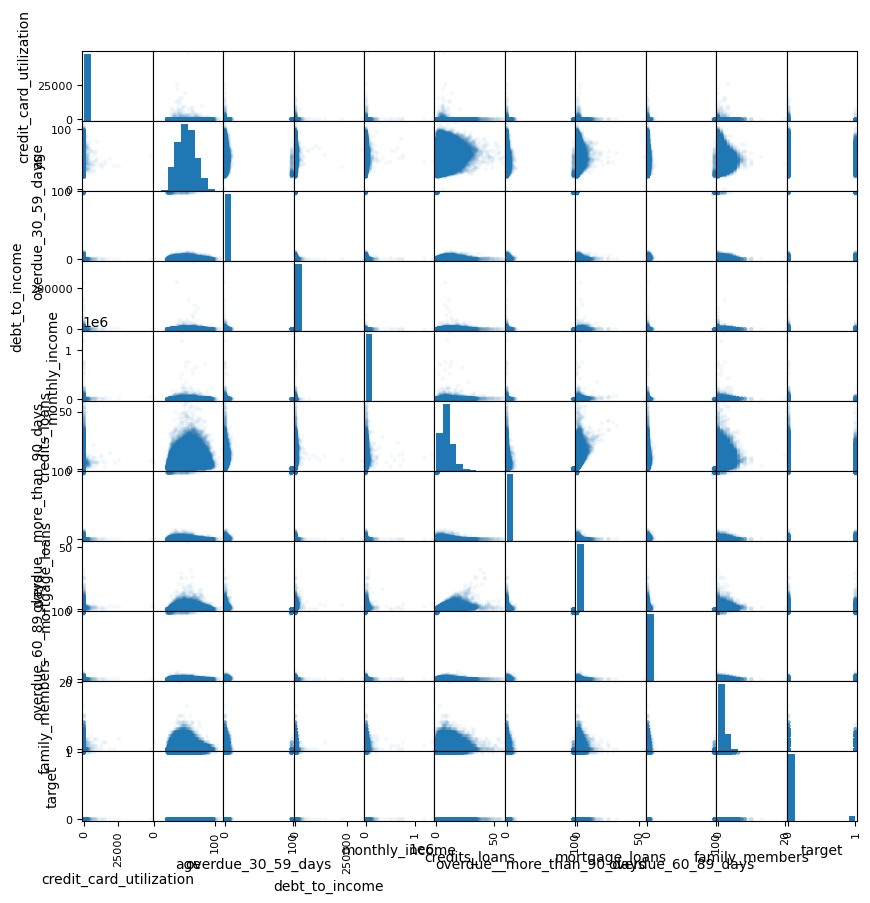

In [275]:
scatter_matrix(xtrain, alpha = 0.05, figsize = (10,10));

# feature_importances_

In [276]:
from sklearn.ensemble import ExtraTreesRegressor
#in ensemble predictions of several base estimators are built in with a given learning algorithm.
#we used ExtraTreesRegressor
model = ExtraTreesRegressor()
#This class implements a meta estimator that fits a number of randomized decision trees 
#on various sub-samples of the dataset and uses averaging to improve the 
#predictive accuracy and control over-fitting.
model.fit(x_train,y_train['target'])

ExtraTreesRegressor()

In [277]:
model.feature_importances_

array([0.23668789, 0.13156565, 0.08740129, 0.17252745, 0.16248877,
       0.10880607, 0.04414748, 0.0563754 ])

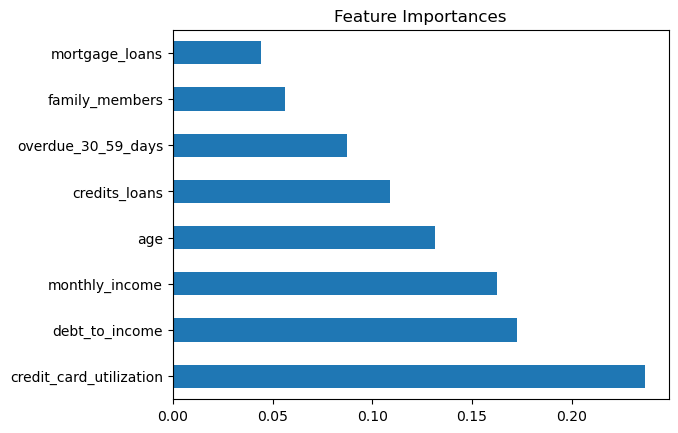

In [278]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# Отбрасывание высококоррелированных переменных

In [279]:
xtrain.drop(columns = ['overdue_60_89_days', 'overdue__more_than_90_days'], inplace = True)

In [280]:
xtest.drop(columns = ['overdue_60_89_days', 'overdue__more_than_90_days'], inplace = True)

# Отбрасывание по квантилям тех столбцов, в которых есть выбросы

In [281]:
for column_name in ['credit_card_utilization', 'age', 'debt_to_income', 'monthly_income']:
    q_low = xtrain[column_name].quantile(0.01)
    q_high = xtrain[column_name].quantile(0.99)
    
    xtrain_filt = xtrain[(xtrain[column_name] < q_high) & (xtrain[column_name] >q_low)]
xtrain_filt = xtrain.reset_index(drop = True)

In [282]:
xtrain_filt

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,mortgage_loans,family_members,target
0,0.000000,56,0,0.504328,6823.894458,9,1,5.0,0
1,0.170659,45,1,2.405860,356.580765,5,0,0.0,0
2,0.342176,75,1,0.445066,20349.895825,9,3,0.0,0
3,0.046219,50,0,0.814508,2894.368968,12,1,3.0,0
4,0.679556,58,0,0.390311,24833.227614,15,4,2.0,0
...,...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,2,0.0,0
105105,0.980631,25,0,0.158753,2187.355843,3,0,0.0,0
105106,0.050256,73,1,0.849711,3961.841113,12,2,0.0,0
105107,0.447882,43,0,0.068033,3705.546719,4,0,0.0,0


# Заполним пропущенные значения медианой

In [283]:
pd.isna(xtest).sum()
pd.isna(xtrain).sum()

credit_card_utilization        0
age                            0
overdue_30_59_days             0
debt_to_income                 0
monthly_income             20993
credits_loans                  0
mortgage_loans                 0
family_members              2805
target                         0
dtype: int64

In [284]:
xtrain['family_members'].fillna(xtrain['family_members'].median(), inplace=True)
xtest['family_members'].fillna(xtrain['family_members'].median(), inplace=True)

In [285]:
xtrain['monthly_income'].fillna(xtrain['monthly_income'].median(), inplace=True)
xtest['monthly_income'].fillna(xtest['monthly_income'].median(), inplace=True)

# Удалим индексы в таблицах

In [286]:
xtest.drop(['index'], axis =1, inplace = True)
ytest.drop(['index'], axis =1, inplace = True)

In [287]:
xtest.head()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,mortgage_loans,family_members
0,0.021069,60,0,0.184907,14403.715440,9,1,0.0
1,0.009985,82,0,0.446264,6768.581963,6,3,0.0
2,0.535187,43,1,0.406317,4686.080429,14,2,3.0
3,0.051264,31,0,0.311893,3867.175176,8,0,1.0
4,0.069525,45,0,0.294956,9869.273012,6,1,2.0


In [288]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((105109, 9), (38876, 8), (105109, 1), (38876, 1))

In [289]:
xtrain = xtrain.drop('target', axis = 1)

In [290]:
x_train = xtrain
x_test = xtest
y_train =  ytrain
y_test = ytest

# Логистическая регрессия

In [291]:
from sklearn.linear_model import LogisticRegression

In [292]:
lr = LogisticRegression(class_weight = 'balanced')

In [293]:
y_test

,target
0,0.226834
1,0.252293
2,0.592295
3,0.697950
4,0.672565
...,...
38871,0.966995
38872,0.161772
38873,0.077566
38874,0.671349


In [294]:
y_test.loc[y_test['target'] <= 0.9, 'target'] = int(0)
y_test.loc[y_test['target'] > 0.9, 'target'] = int(1)

In [295]:
lr.fit(x_train, y_train['target'])

LogisticRegression(class_weight='balanced')

In [296]:
pred_proba = lr.predict_proba(x_test)

In [297]:
pred_proba[pred_proba <= 0.9] = int(0)
pred_proba[pred_proba > 0.9] = int(1)

In [298]:
index = pd.read_csv('X_test.csv')
xtest['index'] = index['index'][0: len(x_test)]

In [299]:
pd.DataFrame({'index':list(xtest['index']),'target':list(pred_proba[0:len(pred_proba),0])}).to_csv('res1.csv', index = False)

In [300]:
from sklearn.metrics import roc_auc_score

In [301]:
roc_auc_score(y_test['target'], pred_proba[0:len(pred_proba),0])

0.4999154649800353

# Баланс классов

In [302]:
y_train.mean(), y_test.mean()

(target    0.066892
 dtype: float64,
 target    0.099213
 dtype: float64)

# Scaling

In [303]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

In [304]:
x_test = x_test.drop('index', axis =1)

In [305]:
scaler = MinMaxScaler()
scaler.fit(x_train)
xtrain_s = scaler.transform(x_train)
xtest_s = scaler.transform(x_test)

# Log regression после scaling

In [306]:
lr = LogisticRegression()

In [307]:
lr.fit(xtest_s, y_test['target'])

LogisticRegression()

In [308]:
pred_proba = lr.predict_proba(xtest_s)

In [309]:
pred_proba[pred_proba <= 0.9] = int(0)
pred_proba[pred_proba > 0.9] = int(1)

In [310]:
roc_auc_score(y_test['target'], pred_proba[0:len(pred_proba),0])

0.49170175280898476

# GaussianNB

In [311]:
from sklearn.naive_bayes import GaussianNB


In [312]:
X = x_train
Y = y_train['target']
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
y_pred = clf.predict(x_test)

In [313]:
roc_auc_score(y_pred, y_test)

0.5125412688629438

# AdaBoostRegressor

In [314]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X = x_train
Y = y_train['target']
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X, Y)
y_pr = regr.predict(x_test)
roc_auc_score(y_test, y_pr)

0.5024162223191954

# XGBoost

In [315]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [316]:
import xgboost as xgb

In [317]:
xgb_cl = xgb.XGBClassifier(objective = 'binary:logistic')

In [318]:
param_grid_xg = {
    'max_depth': [5,6],
    'gamma':[0.8,1],
    'learning_rate': [0.06],
    'reg_lambda': [0.8, 1],
    'reg_alpha': [8,10],
    'scale_pos_weight': [2],
    'subsample': [0.8],
    'colsample_bytree': [0.5],
    'n_estimators': [100],
    'min_child_weight':[0.35],
    'max_leaves': [10]
}

In [319]:
from sklearn.model_selection import GridSearchCV

In [320]:
grid_cv_xg = GridSearchCV(xgb_cl, param_grid_xg, n_jobs = -1, cv =2, scoring ='roc_auc')

In [321]:
grid_cv_xg.fit(x_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             par

In [322]:
y_pred = grid_cv_xg.predict(x_test)

In [323]:
grid_cv_xg.best_score_

0.8370256307877937

без обработки модель

In [324]:
xtest = pd.read_csv('X_test.csv')
xtrain = pd.read_csv('X_train.csv')
ytest = pd.read_csv('y_test_sample.csv')
ytrain = pd.read_csv('y_train.csv')

In [325]:
xtest = xtest.drop('index' , axis =1)

In [326]:
grid_cv_xg.fit(xtrain, ytrain)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             par

In [327]:
y_pred = grid_cv_xg.predict(xtest)

In [328]:
grid_cv_xg.best_score_

0.8637015562367218

# CatBoost

In [329]:
from catboost import CatBoostClassifier, Pool
X= x_train.copy()
Y= y_train.copy()
model = CatBoostClassifier(iterations = 1000, early_stopping_rounds = 30,
                          depth = 5, random_state = 42,
                          verbose = True )
model.fit(X, Y)

Learning rate set to 0.075192
0:	learn: 0.5946927	total: 66.5ms	remaining: 1m 6s
1:	learn: 0.5129924	total: 125ms	remaining: 1m 2s
2:	learn: 0.4509061	total: 193ms	remaining: 1m 3s
3:	learn: 0.3983885	total: 270ms	remaining: 1m 7s
4:	learn: 0.3587468	total: 330ms	remaining: 1m 5s
5:	learn: 0.3281608	total: 387ms	remaining: 1m 4s
6:	learn: 0.3072720	total: 465ms	remaining: 1m 5s
7:	learn: 0.2870800	total: 533ms	remaining: 1m 6s
8:	learn: 0.2709563	total: 588ms	remaining: 1m 4s
9:	learn: 0.2582266	total: 641ms	remaining: 1m 3s
10:	learn: 0.2476536	total: 717ms	remaining: 1m 4s
11:	learn: 0.2385977	total: 807ms	remaining: 1m 6s
12:	learn: 0.2329578	total: 898ms	remaining: 1m 8s
13:	learn: 0.2265219	total: 988ms	remaining: 1m 9s
14:	learn: 0.2223347	total: 1.06s	remaining: 1m 9s
15:	learn: 0.2184642	total: 1.14s	remaining: 1m 9s
16:	learn: 0.2144730	total: 1.2s	remaining: 1m 9s
17:	learn: 0.2123166	total: 1.29s	remaining: 1m 10s
18:	learn: 0.2094573	total: 1.35s	remaining: 1m 9s
19:	learn:

In [330]:
y_pred = model.predict_proba(x_test)

In [331]:
model.best_score_

{'learn': {'Logloss': 0.17485967344406497}}

In [332]:
roc_auc_score(y_test, y_pred[:,1])

0.5078414263991199

In [333]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()


In [334]:
cat.fit(x_train,y_train,verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [335]:
y_pred = cat.predict(x_test)

In [336]:
roc_auc_score(y_test, y_pred)

0.5076030136549526

# LightGBM

В этом разделе рассмотрим применение LightGBM для задачи классификации. Во-первых, мы можем использовать функцию make_classification() создать синтетическую задачу бинарной классификации с 1000 примерами и 20 входными признаками. Весь пример смотрите ниже.

Затем мы можем оценить алгоритм LightGBM на этом наборе данных. Мы будем оценивать модель с помощью повторной стратифицированной k-кратной кросс-валидации с тремя повторами и k, равным 10. Мы сообщим среднее и стандартное отклонения точности модели по всем повторениям и сгибам.

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm 
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
model = LGBMClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
n_scores.mean()

In [ ]:
model.fit(x_train, y_train['target'])

In [ ]:
predictions = model.predict(x_test)

# Roc_auc_curve

In [337]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed